Attempting to curve fit nCLZ 

In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
NDClozapine = os.path.join('data', 'avg5_DOPC_NDMC_last_three_columns1.csv')
NDClozapine = numpy.genfromtxt(fname=NDClozapine, delimiter=',', dtype='unicode')
print(NDClozapine)

[['conc_M_avg_5_DOPC' 'DOPC_NDMC_avg5' 'stdev_NDMC_DOPC_avg5']
 ['0' '-4.14E-18' '2.09E-17']
 ['5.00E-07' '0.18' '0.0594075']
 ['1.00E-06' '0.322' '0.116801']
 ['2.00E-06' '0.821' '0']
 ['5.00E-06' '1.29' '0.266784']
 ['1.00E-05' '1.72' '0.258143']
 ['2.00E-05' '1.99' '0.128156']
 ['5.00E-05' '2.29' '0.0891986']
 ['0.0001' '2.43949' '0']
 ['0.0002' '2.72222' '0']]


In [7]:
NDClozapine_headers = NDClozapine[0]
print(NDClozapine_headers)
NDClozapine_data = NDClozapine[1:,:]
print(NDClozapine_data)

['conc_M_avg_5_DOPC' 'DOPC_NDMC_avg5' 'stdev_NDMC_DOPC_avg5']
[['0' '-4.14E-18' '2.09E-17']
 ['5.00E-07' '0.18' '0.0594075']
 ['1.00E-06' '0.322' '0.116801']
 ['2.00E-06' '0.821' '0']
 ['5.00E-06' '1.29' '0.266784']
 ['1.00E-05' '1.72' '0.258143']
 ['2.00E-05' '1.99' '0.128156']
 ['5.00E-05' '2.29' '0.0891986']
 ['0.0001' '2.43949' '0']
 ['0.0002' '2.72222' '0']]


In [11]:
NDClozapine_data = NDClozapine_data.astype(numpy.float)
print(NDClozapine_data)
print(NDClozapine_data[:,0])

[[ 0.00000e+00 -4.14000e-18  2.09000e-17]
 [ 5.00000e-07  1.80000e-01  5.94075e-02]
 [ 1.00000e-06  3.22000e-01  1.16801e-01]
 [ 2.00000e-06  8.21000e-01  0.00000e+00]
 [ 5.00000e-06  1.29000e+00  2.66784e-01]
 [ 1.00000e-05  1.72000e+00  2.58143e-01]
 [ 2.00000e-05  1.99000e+00  1.28156e-01]
 [ 5.00000e-05  2.29000e+00  8.91986e-02]
 [ 1.00000e-04  2.43949e+00  0.00000e+00]
 [ 2.00000e-04  2.72222e+00  0.00000e+00]]
[0.e+00 5.e-07 1.e-06 2.e-06 5.e-06 1.e-05 2.e-05 5.e-05 1.e-04 2.e-04]


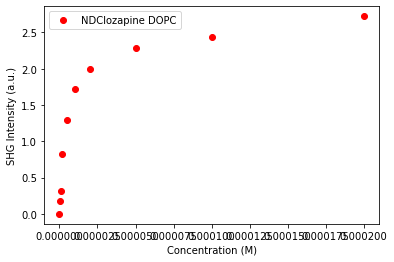

In [22]:
plt.figure() #creates a new figure
xdata=NDClozapine_data[:,0] 
ydata=NDClozapine_data[:,1]

plt.xlabel('Concentration (M)')
plt.ylabel('SHG Intensity (a.u.)')

plt.plot(xdata,ydata,'ro',label="NDClozapine DOPC")
plt.legend()

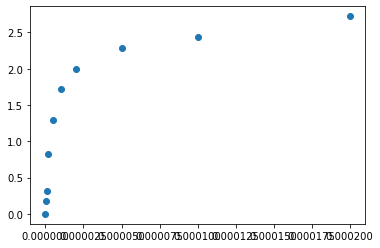

In [21]:
xdata = np.asarray(x)
ydata = np.asarray(y)
plt.plot(xdata, ydata, 'o')

In [31]:
# Code input for the Gaussian function fit

# Define the Gaussian function
def Langmuir(x,k,M):
    y=((np.sqrt(M)*k*x)/(1+(k*x)))**2
    return y
parameters, covariance = curve_fit(Langmuir, xdata, ydata)
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

520082.8853286031
2.5491558183367333


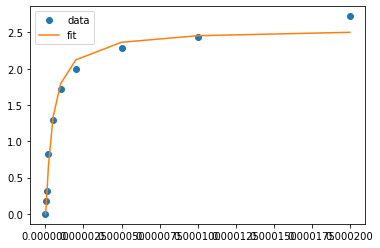

In [38]:
fit_y = Langmuir(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()


In [36]:
SE = np.sqrt(np.diag(covariance))
print(SE)

[5.93502525e+04 7.11011270e-02]
